# Speed Dating Experiment
# Introduction
What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information.

## Credits
Data provided by Anna Montoya on data.world.

You can find the dataset at https://data.world/annavmontoya/speed-dating-experiment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
datafile = 'SpeedDatingData.csv'
df = pd.read_csv(datafile)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.columns.to_list())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

# Participation statistics
Let's start by exploring some descriptive statistics of the dataset.

## Male - Female distribution

In this datasets, genders where distinguished only by female (value 0) and male (value 1). Let's see if there was an equal distribution of genders within the participants.

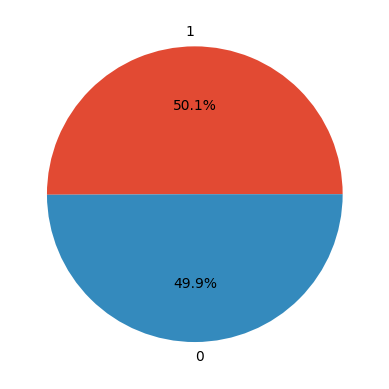

In [4]:
x = df['gender'].value_counts()
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.show()

Male and female participants were equally distributed.

## Race distribution
Let's see how races were distributed. Since the speed dating events took place at North American university, we might expected to have a majority of white-caucasian people.

Index:
1. Black/African American
2. European/Caucasian-American
3. Latino/Hispanic American
4. Asian/Pacific Islander/Asian-American
5. Native American
6. Other

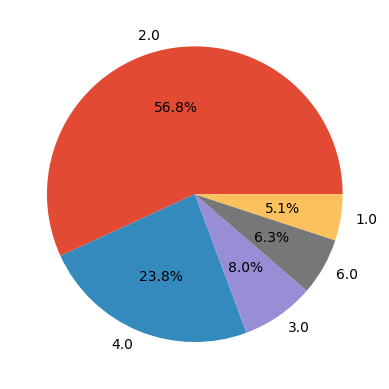

In [5]:
x = df['race'].value_counts()
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.show()

As expected, caucasian participants were the majority. There were no Native American participants.

## Age distribution
Since the event took place at a university, we might expect the majority of people to be between 20 to 30 years old. The data should be left skewed, since there might be participants older than 30, but there shouldn't be partipants below 18.

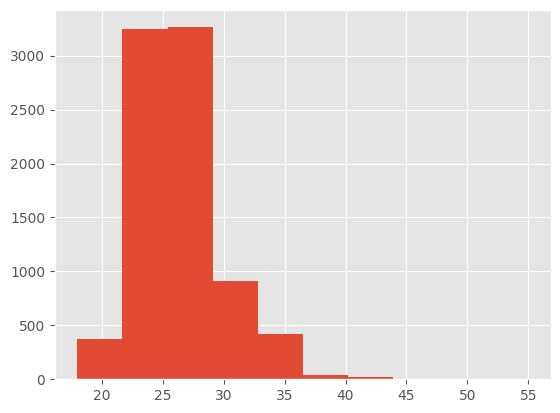

In [8]:
plt.hist(df['age'])
plt.show()

## Major/Field distribution
People from which majors or fields of study are more open to speed dating?

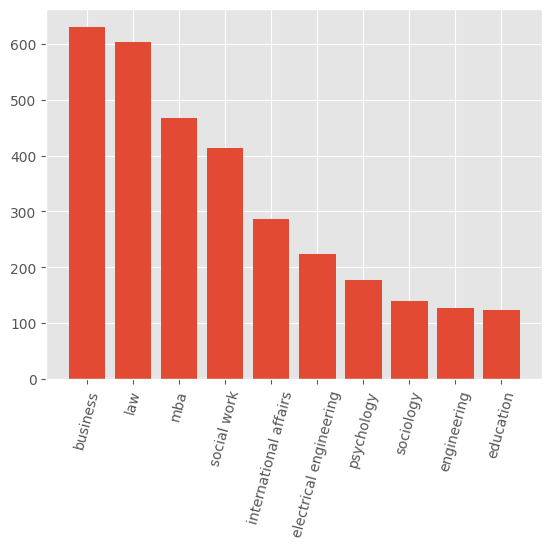

In [9]:
df['field'] = df['field'].str.lower()
x = df['field'].value_counts().sort_values(ascending=False).head(10)
plt.bar(x.index, x)
plt.xticks(rotation=75)
plt.show()

People from business and law fields participated in great numbers, while people from sociology, engineering or education fields were a few, or they gave up soon, since this is a cumulative participants count of multiple events and the same person might have participated more than once.

# Survey results

## Why speed dating?
Let's see what are the main reasons why people have participated to these speed dating events. The available answers in the survey were:
1. Seemed like a fun night out
2. To meet new people
3. To get a date
4. Looking for a serious relationship
5. To say I did it
6. Other

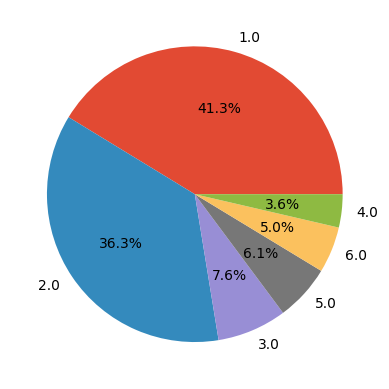

In [10]:
x = df['goal'].value_counts()
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.show()

It seems that having fun and meeting new people are dominant reasons why people decided to do speed dating. But is it because these were the "safest" answers? Maybe some people did not want to declare their real intentions. We cannot what's the answer just from these results.

On the other people who went to a speed dating to find a serious relationship were just 3.6%, which is understandable since just 4 minutes of conversation might not be helpful in finding love, and most of the participants were quite young.

## Who goes more on dates?
With this question, participants were aksed to declare how frequently they go on dates, excluding these speed dating events. The possible answers were:
* Several times a week=1
* Twice a week=2
* Once a week=3
* Twice a month=4
* Once a month=5
* Several times a year=6
* Almost never=7

### Men vs Women
So, in this case a lower number means higher frequency. Let's see how female compare to male.

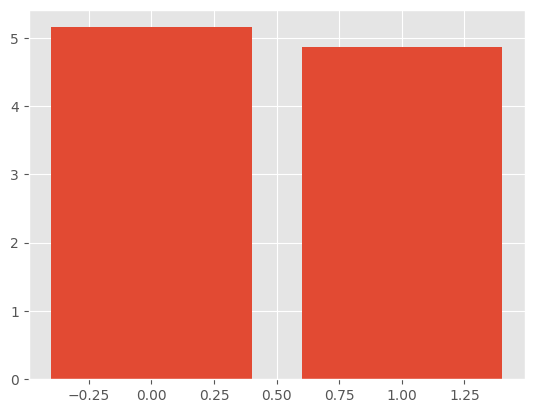

In [12]:
x = df.groupby('gender')['date'].mean()
plt.bar(x.index, x)
plt.show()

Both man and women go on dates approximately with the same frequency between once to twice per month, which is reasonable, considering the participants age and occupation.

### Date frequency by race
Let's see if race affects the date frequency.
1. Black/African American
2. European/Caucasian-American
3. Latino/Hispanic American
4. Asian/Pacific Islander/Asian-American
5. Native American
6. Other

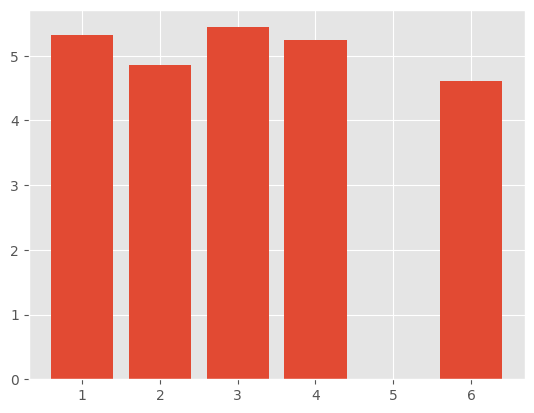

In [13]:
x = df.groupby('race')['date'].mean()
plt.bar(x.index, x)
plt.show()

Race does not seem to affect date frequency. People of all races went on dates between once to twice per month. Although we cannot say anything about Native Americans, since there were no Native American participants.

## Who hangs out more?
Question: How often do you go out (not necessarily on dates)?
* Several times a week=1
* Twice a week=2
* Once a week=3
* Twice a month=4
* Once a month=5
* Several times a year=6
* Almost never=7

Again, here a higher number means a lower hangout frequency.

### Men vs Women
Let's see who hangs out more between women and men.

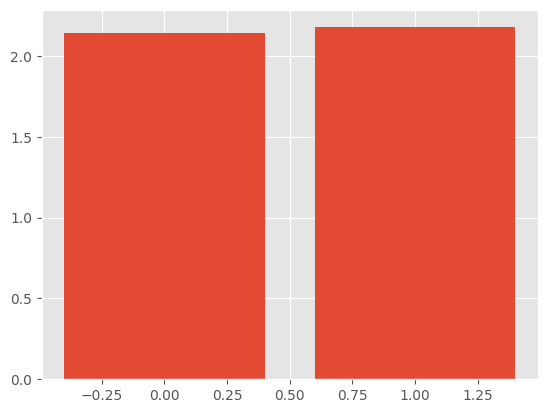

In [14]:
x = df.groupby('gender')['go_out'].mean()
plt.bar(x.index, x)
plt.show()

Men and women hang out approximately with the same frequency of twice per week, probably on Friday and Saturday.

### Hangout frequency by race
1. Black/African American
2. European/Caucasian-American
3. Latino/Hispanic American
4. Asian/Pacific Islander/Asian-American
5. Native American
6. Other

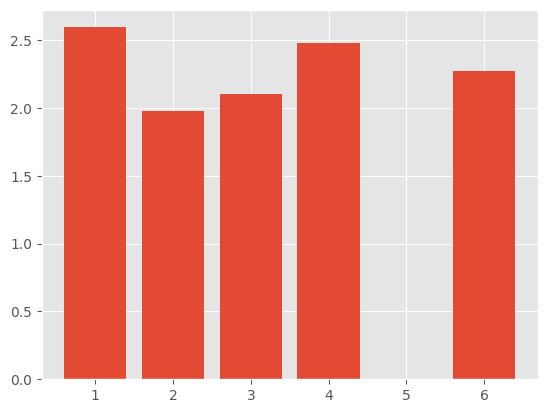

In [15]:
x = df.groupby('race')['go_out'].mean()
plt.bar(x.index, x)
plt.show()

People of all races hang out with similar frequency, but black/african american and asian people seem to hang out a bit less frequently. Since might be due to them being a minority in the environemnt where the events took place or due to discrimination, but this is out of scope of this analysis.

## Was speed dating successfull?
Let's see how many people found a match in these speed dating events.

Values:

0. Did not find a match
1. Found a match

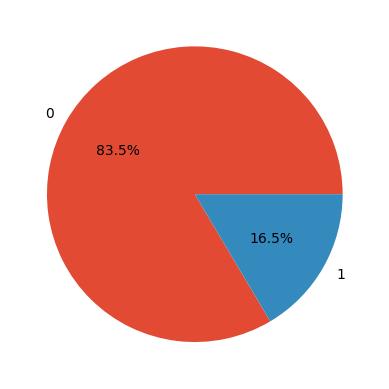

In [16]:
x = df['match'].value_counts()
plt.pie(x, labels=x.index, autopct='%1.1f%%')
plt.show()

Only 16.5% of people found a match in these events. Well, finding people who match our personlity or expectations is not easy, let alone in just 4 minutes!

Finally let's see how many dates men and women needed on average before finding a match.

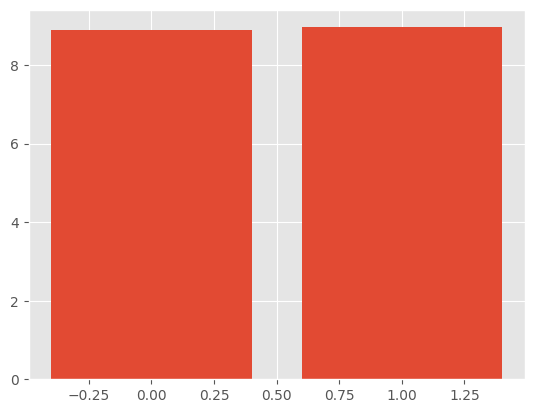

In [19]:
x = df.groupby('gender')['order'].mean()
plt.bar(x.index, x)
plt.show()

Again, no big differences between men and women. Both of them needed about 9 dates before finding a match. Nine might be the magical number of dates we need to gothrough before finding the right one. Or this might just mean that both man and women wanted to see many options before making their choice. Or there might be many other reasons why this number came out, but we cannot know because describing reality with data is not such an easy task.